# Storytelling Data Visualization on Exchange Rates

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.
If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

In [2]:
import pandas as pd
import numpy as np

exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
Period\Unit:                5699 non-null object
[Australian dollar ]        5699 non-null object
[Bulgarian lev ]            5297 non-null object
[Brazilian real ]           5431 non-null object
[Canadian dollar ]          5699 non-null object
[Swiss franc ]              5699 non-null object
[Chinese yuan renminbi ]    5431 non-null object
[Cypriot pound ]            2346 non-null object
[Czech koruna ]             5699 non-null object
[Danish krone ]             5699 non-null object
[Estonian kroon ]           3130 non-null object
[UK pound sterling ]        5699 non-null object
[Greek drachma ]            520 non-null object
[Hong Kong dollar ]         5699 non-null object
[Croatian kuna ]            5431 non-null object
[Hungarian forint ]         5699 non-null object
[Indonesian rupiah ]        5699 non-null object
[Israeli shekel ]           5431 non-null object
[Indian rupe

In [9]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time')

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5693,1999-01-11,1.8134,NaN,NaN,1.7463,1.6104,NaN,0.58167,35.173,7.4433,...,1.2980,27.0148,9.0985,1.9358,188.9655,42.509,41.9568,0.3725,1.1569,6.7910
5692,1999-01-12,1.8090,NaN,NaN,1.7392,1.6072,NaN,0.58140,35.250,7.4430,...,1.2912,26.6366,9.0955,1.9343,189.5352,42.490,41.9850,0.3721,1.1520,6.9581
5691,1999-01-13,1.8620,NaN,NaN,1.8123,1.5931,NaN,0.58190,36.113,7.4432,...,1.3149,26.4489,9.1400,1.9815,191.2016,42.794,43.4924,0.3764,1.1744,7.2543
5690,1999-01-14,1.8353,NaN,NaN,1.7707,1.5934,NaN,0.58190,35.698,7.4437,...,1.3134,26.5723,9.1350,1.9615,188.9441,42.757,43.1217,0.3751,1.1653,7.1316
5689,1999-01-15,1.8388,NaN,NaN,1.7797,1.5984,NaN,0.58187,35.860,7.4441,...,1.3164,26.5662,9.1570,1.9570,187.1333,42.738,43.4042,0.3742,1.1626,7.2197


In [11]:
euro_to_dollar=exchange_rates[['Time','US_dollar']]

In [12]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
1.1268     6
1.1193     6
1.0867     6
1.3086     6
1.0888     6
1.3373     6
1.2713     6
1.1218     6
1.3532     6
1.1346     6
1.3588     5
1.1187     5
1.1115     5
1.1221     5
1.0737     5
1.1389     5
1.1168     5
1.1328     5
0.8803     5
1.1279     5
1.3246     5
1.1236     5
1.2219     5
1.3200     5
1.1146     5
          ..
1.3959     1
1.2316     1
0.8745     1
1.1291     1
1.2378     1
1.2478     1
1.2052     1
1.2886     1
1.1042     1
0.9770     1
1.1815     1
1.1587     1
1.3391     1
1.2165     1
1.0753     1
1.2151     1
1.2183     1
1.2747     1
1.3699     1
1.0798     1
1.2775     1
1.0567     1
1.2926     1
1.5574     1
1.3420     1
0.9593     1
1.1485     1
0.8991     1
1.3222     1
1.1686     1
Name: US_dollar, Length: 3528, dtype: int64

In [18]:
euro_to_dollar=euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)

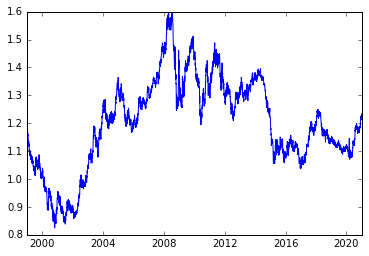

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

 If we want to hide it and show only the long-term trends, we can use the rolling mean 

In [26]:
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar 

,Time,US_dollar,rolling_mean_30
0,2021-01-08,1.2250,NaN
1,2021-01-07,1.2276,NaN
2,2021-01-06,1.2338,NaN
3,2021-01-05,1.2271,NaN
4,2021-01-04,1.2296,NaN
5,2020-12-31,1.2271,NaN
6,2020-12-30,1.2281,NaN
7,2020-12-29,1.2259,NaN
8,2020-12-28,1.2219,NaN
9,2020-12-24,1.2193,NaN


In [28]:
euro_to_dollar['rolling_mean_365'] = euro_to_dollar['US_dollar'].rolling(365).mean()
euro_to_dollar['rolling_mean_365']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
5669    1.019801
5670    1.020298
5671    1.020795
5672    1.021291
5673    1.021774
5674    1.022253
5675    1.022726
5676    1.023233
5677    1.023738
5678    1.024226
5679    1.024741
5680    1.025288
5681    1.025871
5682    1.026489
5683    1.027084
5684    1.027676
5685    1.028252
5686    1.028810
5687    1.029351
5688    1.029912
5689    1.030488
5690    1.031041
5691    1.031633
5692    1.032179
5693    1.032748
5694    1.033294
5695    1.033863
5696    1.0344

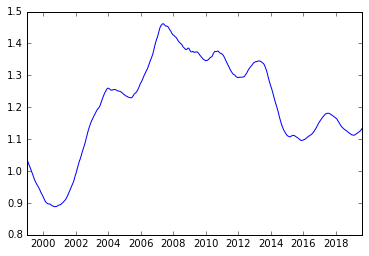

In [29]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean_365'])

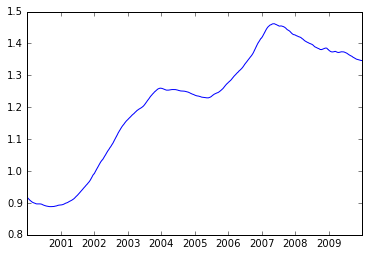

In [49]:
year2001=euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2000,2009)]\
[['Time','rolling_mean_365']]
plt.plot(year2001['Time'],
         year2001['rolling_mean_365'])